# **Primeros Pasos**

Librerias y dataframe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Leyendo el dataset

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Optimizacion/co_properties.csv')
df = pd.read_csv('/content/co_properties.csv')


## Montando el dataframe

In [ ]:
df.shape

(1000000, 25)

In [ ]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [ ]:
# Columnas escogidas

# new_df = df[['lat', 'lon', 'l1', 'l2', 'l3', 'bedrooms', 'bathrooms', 'price',
#              'currency', 'property_type', 'operation_type']]
new_df = df[['lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms',
             'surface_total', 'surface_covered', 'price', 'currency', 'property_type', 'operation_type']]


In [ ]:
new_df

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,NaN,6.0,7.0,NaN,NaN,1.300000e+09,COP,Casa,Venta
1,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,NaN,NaN,7.0,NaN,NaN,2.800000e+09,COP,Casa,Venta
2,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,NaN,NaN,7.0,NaN,NaN,2.800000e+09,COP,Casa,Venta
3,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,NaN,5.0,8.0,NaN,NaN,3.500000e+09,COP,Casa,Venta
4,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,NaN,8.0,9.0,NaN,NaN,4.800000e+08,COP,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,6.186412,-75.658630,Colombia,Antioquia,Medellín,NaN,2.0,1.0,NaN,NaN,7.000000e+05,COP,Apartamento,Arriendo
999996,6.186412,-75.658630,Colombia,Antioquia,Medellín,NaN,2.0,1.0,NaN,NaN,7.000000e+05,COP,Apartamento,Arriendo
999997,6.186412,-75.658630,Colombia,Antioquia,Medellín,NaN,2.0,1.0,NaN,NaN,7.000000e+05,COP,Apartamento,Arriendo
999998,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,NaN,3.0,4.0,NaN,NaN,7.000000e+08,COP,Casa,Venta


# Limpiando el DataFrame

In [ ]:
cleandf = new_df.copy()

In [ ]:
cleandf

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,NaN,6.0,7.0,NaN,NaN,1.300000e+09,COP,Casa,Venta
1,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,NaN,NaN,7.0,NaN,NaN,2.800000e+09,COP,Casa,Venta
2,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,NaN,NaN,7.0,NaN,NaN,2.800000e+09,COP,Casa,Venta
3,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,NaN,5.0,8.0,NaN,NaN,3.500000e+09,COP,Casa,Venta
4,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,NaN,8.0,9.0,NaN,NaN,4.800000e+08,COP,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,6.186412,-75.658630,Colombia,Antioquia,Medellín,NaN,2.0,1.0,NaN,NaN,7.000000e+05,COP,Apartamento,Arriendo
999996,6.186412,-75.658630,Colombia,Antioquia,Medellín,NaN,2.0,1.0,NaN,NaN,7.000000e+05,COP,Apartamento,Arriendo
999997,6.186412,-75.658630,Colombia,Antioquia,Medellín,NaN,2.0,1.0,NaN,NaN,7.000000e+05,COP,Apartamento,Arriendo
999998,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,NaN,3.0,4.0,NaN,NaN,7.000000e+08,COP,Casa,Venta


## Analizando columnas

### Lon y lat

lon

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_lon_count = new_df['lon'].isnull().sum()
print(f"Number of non-null values in lon: {null_lon_count}")

NaN_lon_count = new_df['lon'].isna().sum()
print(f"Number of NaN values in lon: {NaN_lon_count}")


Number of non-null values in lon: 259718
Number of NaN values in lon: 259718


lat

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_lat_count = new_df['lat'].isnull().sum()
print(f"Number of non-null values in lat: {null_lat_count}")

NaN_lat_count = new_df['lat'].isna().sum()
print(f"Number of NaN values in lat: {NaN_lat_count}")


Number of non-null values in lat: 259719
Number of NaN values in lat: 259719


### l1

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_l1_count = new_df['l1'].isnull().sum()
print(f"Number of non-null values in l1: {null_l1_count}")

NaN_l1_count = new_df['l1'].isna().sum()
print(f"Number of NaN values in l1: {NaN_l1_count}")


Number of non-null values in l1: 0
Number of NaN values in l1: 0


In [ ]:
#Mostrando discordancias

filtered_df = new_df[(new_df['l1'].notnull()) & (new_df['l1'] != 'Colombia')]

filtered_df


,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
329928,6.152340,-75.606021,Estados Unidos,Florida,NaN,3.0,3.0,2.0,NaN,NaN,365000000.0,COP,Apartamento,Venta
583696,6.152263,-75.600969,Estados Unidos,Florida,NaN,3.0,3.0,NaN,NaN,NaN,2200000.0,COP,Apartamento,Arriendo


### l2
 (no hay nada raro)

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_l2_count = new_df['l2'].isnull().sum()
print(f"Number of non-null values in l1: {null_l2_count}")

NaN_l2_count = new_df['l2'].isna().sum()
print(f"Number of NaN values in l1: {NaN_l2_count}")


Number of non-null values in l1: 0
Number of NaN values in l1: 0


### l3
(no afecta que existan nulos, es una variable categorica)

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_l3_count = new_df['l3'].isnull().sum()
print(f"Number of non-null values in l3: {null_l3_count}")

NaN_l3_count = new_df['l3'].isna().sum()
print(f"Number of NaN values in l3: {NaN_l3_count}")


Number of non-null values in l3: 62812
Number of NaN values in l3: 62812


In [ ]:
#Observado errores

filtered_df = new_df[(new_df['l3'].isnull())]

filtered_df

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,NaN,6.0,7.0,NaN,NaN,1.300000e+09,COP,Casa,Venta
55,4.826252,-75.683261,Colombia,Risaralda,NaN,4.0,4.0,NaN,NaN,NaN,2.700000e+08,COP,Casa,Venta
56,4.816264,-75.696573,Colombia,Risaralda,NaN,4.0,4.0,NaN,NaN,NaN,1.800000e+08,COP,Casa,Venta
57,4.541471,-75.664193,Colombia,Quindío,NaN,4.0,4.0,NaN,NaN,NaN,2.000000e+06,COP,Casa,Arriendo
58,4.826252,-75.683261,Colombia,Risaralda,NaN,4.0,4.0,NaN,NaN,NaN,2.700000e+08,COP,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998160,NaN,NaN,Colombia,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,2.900000e+08,COP,Apartamento,Venta
998161,11.380061,-72.242803,Colombia,La Guajira,NaN,NaN,NaN,2.0,NaN,NaN,2.400000e+08,COP,Apartamento,Venta
998162,NaN,NaN,Colombia,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,7.000000e+08,COP,Apartamento,Venta
998163,NaN,NaN,Colombia,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,2.000000e+06,COP,Apartamento,Arriendo


### bedrooms
(elimina la mitad)

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_bedrooms_count = new_df['bedrooms'].isnull().sum()
print(f"Number of non-null values in bedrooms: {null_bedrooms_count}")

NaN_bedrooms_count = new_df['bedrooms'].isna().sum()
print(f"Number of NaN values in bedrooms: {NaN_bedrooms_count}")

Number of non-null values in bedrooms: 623954
Number of NaN values in bedrooms: 623954


### bathrooms

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_bathrooms_count = new_df['bathrooms'].isnull().sum()
print(f"Number of non-null values in bathrooms: {null_bathrooms_count}")

NaN_bathrooms_count = new_df['bathrooms'].isna().sum()
print(f"Number of NaN values in bathrooms: {NaN_bathrooms_count}")

Number of non-null values in bathrooms: 200507
Number of NaN values in bathrooms: 200507


### surface_total
 (elimina mas del 90% xd)

In [ ]:
#Cantidad de no nulos y cantidad de NaN en surface_total

#null_surface_total_count = new_df['surface_total'].isnull().sum()
#print(f"Number of non-null values in surface_total: {null_surface_total_count}")

#NaN_surface_total_count = new_df['surface_total'].isna().sum()
#print(f"Number of NaN values in surface_total: {NaN_surface_total_count}")

In [ ]:
#Observado los pocos casos

#filtered_df = new_df[(new_df['surface_total'].notnull())]

filtered_df

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,NaN,6.0,7.0,NaN,NaN,1.300000e+09,COP,Casa,Venta
55,4.826252,-75.683261,Colombia,Risaralda,NaN,4.0,4.0,NaN,NaN,NaN,2.700000e+08,COP,Casa,Venta
56,4.816264,-75.696573,Colombia,Risaralda,NaN,4.0,4.0,NaN,NaN,NaN,1.800000e+08,COP,Casa,Venta
57,4.541471,-75.664193,Colombia,Quindío,NaN,4.0,4.0,NaN,NaN,NaN,2.000000e+06,COP,Casa,Arriendo
58,4.826252,-75.683261,Colombia,Risaralda,NaN,4.0,4.0,NaN,NaN,NaN,2.700000e+08,COP,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998160,NaN,NaN,Colombia,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,2.900000e+08,COP,Apartamento,Venta
998161,11.380061,-72.242803,Colombia,La Guajira,NaN,NaN,NaN,2.0,NaN,NaN,2.400000e+08,COP,Apartamento,Venta
998162,NaN,NaN,Colombia,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,7.000000e+08,COP,Apartamento,Venta
998163,NaN,NaN,Colombia,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,2.000000e+06,COP,Apartamento,Arriendo


### surface_covered
(elimina mas del 90% xd)

In [ ]:
## Cantidad de no nulos y cantidad de NaN en surface_covered

# null_surface_covered_count = new_df['surface_covered'].isnull().sum()
# print(f"Number of non-null values in surface_covered: {null_surface_covered_count}")

# NaN_surface_covered_count = new_df['surface_covered'].isna().sum()
# print(f"Number of NaN values in surface_covered: {NaN_surface_covered_count}")

In [ ]:
# #Observado los pocos casos

# filtered_df = new_df[(new_df['surface_covered'].notnull())]

# filtered_df

### price

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_price_count = new_df['price'].isnull().sum()
print(f"Number of non-null values in price: {null_price_count}")

NaN_price_count = new_df['price'].isna().sum()
print(f"Number of NaN values in price: {NaN_price_count}")

Number of non-null values in price: 509
Number of NaN values in price: 509


### currency

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_currency_count = new_df['currency'].isnull().sum()
print(f"Number of non-null values in currency: {null_currency_count}")

NaN_currency_count = new_df['currency'].isna().sum()
print(f"Number of NaN values in currency: {NaN_currency_count}")

Number of non-null values in currency: 550
Number of NaN values in currency: 550


In [ ]:
#Mostrando discordancias

#filtered_df = new_df[(new_df['currency'].notnull()) & (new_df['currency'] != 'COP')]
filtered_df = new_df[ (new_df['currency'] != 'COP')]

filtered_df.shape


(598, 14)

### 'property_type'

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_property_type_count = new_df['property_type'].isnull().sum()
print(f"Number of non-null values in property_type: {null_property_type_count}")

NaN_property_type_count = new_df['property_type'].isna().sum()
print(f"Number of NaN values in property_type: {NaN_property_type_count}")


Number of non-null values in property_type: 0
Number of NaN values in property_type: 0


In [ ]:
# prompt: dentro de new_df, muestrame los distintos valores que hay en la variable 'property_type' y luego muestrame cuantos son distintos de 'Casa' y 'Apartamento'

# Valores distintos en la variable 'property_type'
distinct_property_types = new_df['property_type'].unique()
print(f"Distinct property types: {distinct_property_types}")

# Cantidad de valores distintos de 'Casa' y 'Apartamento'
non_casa_apartamento_count = new_df[~new_df['property_type'].isin(['Casa', 'Apartamento'])].shape[0]
print(f"Number of values not 'Casa' or 'Apartamento': {non_casa_apartamento_count}")


Distinct property types: ['Casa' 'Lote' 'Otro' 'Finca' 'Oficina' 'Apartamento' 'Local comercial'
 'Depósito' 'Parqueadero']
Number of values not 'Casa' or 'Apartamento': 214495


### operation_type

In [ ]:
#Cantidad de no nulos y cantidad de NaN

null_operation_type_count = new_df['operation_type'].isnull().sum()
print(f"Number of non-null values in operation_type: {null_operation_type_count}")

NaN_operation_type_count = new_df['operation_type'].isna().sum()
print(f"Number of NaN values in operation_type: {NaN_operation_type_count}")


Number of non-null values in operation_type: 0
Number of NaN values in operation_type: 0


In [ ]:

# Valores distintos en la variable 'operation_type'
distinct_operation_types = new_df['operation_type'].unique()
print(f"Distinct property types: {distinct_operation_types}")


# Cantidad de valores distintos de 'Venta'
non_venta_count = new_df[~new_df['operation_type'].isin(['Venta'])].shape[0]
print(f"Number of values not 'Venta': {non_venta_count}")


Distinct property types: ['Venta' 'Arriendo' 'Arriendo temporal']
Number of values not 'Venta': 428116


## Eliminando

In [ ]:
# Eliminar de 'cleandf' donde 'lat' o 'lon' sean nulos
cleandf = cleandf[cleandf['lat'].notna() & cleandf['lon'].notna()]

# Eliminar en 'l1' donde sea distinto de Colombia
cleandf = cleandf[cleandf['l1'] == 'Colombia']

# Eliminando de 'cleandf' donde 'rooms' sea nulo
cleandf = cleandf[cleandf['rooms'].notnull()]

# Eliminando de 'cleandf' donde 'bedrooms' sea nulo
cleandf = cleandf[cleandf['bedrooms'].notnull()]

# Eliminando de 'cleandf' donde 'bathrooms' sea nulo
cleandf = cleandf[cleandf['bathrooms'].notnull()]

# Eliminando de 'cleandf' donde 'surface_total' sea nulo
cleandf = cleandf[cleandf['surface_total'].notnull()]

# Eliminando de 'cleandf' donde 'surface_covered' sea nulo
cleandf = cleandf[cleandf['surface_covered'].notnull()]

# Eliminando de 'cleandf' donde 'price' sea nulo
cleandf = cleandf[cleandf['price'].notnull()]

# Eliminar en 'curency' donde sea null o distinto de  'COP'
cleandf = cleandf[cleandf['currency'] == 'COP']

#Eliminar en 'property type' donde sean distintos de Casa y Apartamento
cleandf = cleandf[cleandf['property_type'].isin(['Casa', 'Apartamento'])]

#Mantener solo las operaciones donde sean ventas 'operatyopn_type' = 'Venta'
cleandf = cleandf[cleandf['operation_type'].isin(['Venta'])]


cleandf.shape

(15244, 14)

In [ ]:
cleandf

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
183,3.440,-76.506,Colombia,Valle del Cauca,Cali,3.0,3.0,1.0,85.0,85.0,1.500000e+08,COP,Casa,Venta
412,3.432,-76.465,Colombia,Valle del Cauca,Cali,4.0,4.0,2.0,48.0,96.0,1.250000e+08,COP,Casa,Venta
413,3.432,-76.465,Colombia,Valle del Cauca,Cali,4.0,4.0,2.0,48.0,96.0,1.150000e+08,COP,Casa,Venta
854,6.293,-75.598,Colombia,Antioquia,Medellín,3.0,3.0,2.0,74.0,74.0,1.550000e+08,COP,Casa,Venta
873,4.753,-74.112,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,63.0,63.0,1.750000e+08,COP,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999865,4.729,-74.064,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,96.0,96.0,4.400000e+08,COP,Apartamento,Venta
999869,4.712,-74.083,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,3.0,186.0,186.0,9.800000e+08,COP,Apartamento,Venta
999870,4.717,-74.080,Colombia,Cundinamarca,Bogotá D.C,4.0,4.0,3.0,175.0,175.0,1.300000e+09,COP,Apartamento,Venta
999871,4.713,-74.082,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,3.0,190.0,190.0,9.500000e+08,COP,Apartamento,Venta


## Normalizando

In [ ]:
# Create two new columns for 'Casa' and 'Apartamento'
cleandf['Casa'] = cleandf['property_type'].apply(lambda x: 1 if x == 'Casa' else 0)
cleandf['Apartamento'] = cleandf['property_type'].apply(lambda x: 1 if x == 'Apartamento' else 0)

import math
cleandf['price'] = list(map(lambda x: 0 if x==0 else math.log10(x), cleandf['price']))

# Drop the original 'property_type' column
cleandf = cleandf.drop('property_type', axis=1)

# Display the updated DataFrame
cleandf


,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,operation_type,Casa,Apartamento
183,3.440,-76.506,Colombia,Valle del Cauca,Cali,3.0,3.0,1.0,85.0,85.0,8.176091,COP,Venta,1,0
412,3.432,-76.465,Colombia,Valle del Cauca,Cali,4.0,4.0,2.0,48.0,96.0,8.096910,COP,Venta,1,0
413,3.432,-76.465,Colombia,Valle del Cauca,Cali,4.0,4.0,2.0,48.0,96.0,8.060698,COP,Venta,1,0
854,6.293,-75.598,Colombia,Antioquia,Medellín,3.0,3.0,2.0,74.0,74.0,8.190332,COP,Venta,1,0
873,4.753,-74.112,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,63.0,63.0,8.243038,COP,Venta,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999865,4.729,-74.064,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,96.0,96.0,8.643453,COP,Venta,0,1
999869,4.712,-74.083,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,3.0,186.0,186.0,8.991226,COP,Venta,0,1
999870,4.717,-74.080,Colombia,Cundinamarca,Bogotá D.C,4.0,4.0,3.0,175.0,175.0,9.113943,COP,Venta,0,1
999871,4.713,-74.082,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,3.0,190.0,190.0,8.977724,COP,Venta,0,1


In [ ]:
# prompt: Lets normalize the df ''cleandf' the values of 'property_type', 'Casa' convert to 0 and 'Apartamento' convert to 1

#cleandf['property_type'] = cleandf['property_type'].replace(['Casa', 'Apartamento'], [0, 1])

In [ ]:
# prompt: divide entre 1000000 todos los valores dentro de la columna price en cleandf

#cleandf['price'] = cleandf['price'] / 1000000000

In [ ]:
finaldf = cleandf[['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'Casa', 'Apartamento', 'surface_total', 'surface_covered', 'price']]
finaldf

,lat,lon,rooms,bedrooms,bathrooms,Casa,Apartamento,surface_total,surface_covered,price
183,3.440,-76.506,3.0,3.0,1.0,1,0,85.0,85.0,8.176091
412,3.432,-76.465,4.0,4.0,2.0,1,0,48.0,96.0,8.096910
413,3.432,-76.465,4.0,4.0,2.0,1,0,48.0,96.0,8.060698
854,6.293,-75.598,3.0,3.0,2.0,1,0,74.0,74.0,8.190332
873,4.753,-74.112,3.0,3.0,2.0,1,0,63.0,63.0,8.243038
...,...,...,...,...,...,...,...,...,...,...
999865,4.729,-74.064,3.0,3.0,2.0,0,1,96.0,96.0,8.643453
999869,4.712,-74.083,3.0,3.0,3.0,0,1,186.0,186.0,8.991226
999870,4.717,-74.080,4.0,4.0,3.0,0,1,175.0,175.0,9.113943
999871,4.713,-74.082,3.0,3.0,3.0,0,1,190.0,190.0,8.977724


# **Modelos**


In [ ]:
corr = finaldf.corr()

finaldf

,lat,lon,rooms,bedrooms,bathrooms,Casa,Apartamento,surface_total,surface_covered,price
183,3.440,-76.506,3.0,3.0,1.0,1,0,85.0,85.0,8.176091
412,3.432,-76.465,4.0,4.0,2.0,1,0,48.0,96.0,8.096910
413,3.432,-76.465,4.0,4.0,2.0,1,0,48.0,96.0,8.060698
854,6.293,-75.598,3.0,3.0,2.0,1,0,74.0,74.0,8.190332
873,4.753,-74.112,3.0,3.0,2.0,1,0,63.0,63.0,8.243038
...,...,...,...,...,...,...,...,...,...,...
999865,4.729,-74.064,3.0,3.0,2.0,0,1,96.0,96.0,8.643453
999869,4.712,-74.083,3.0,3.0,3.0,0,1,186.0,186.0,8.991226
999870,4.717,-74.080,4.0,4.0,3.0,0,1,175.0,175.0,9.113943
999871,4.713,-74.082,3.0,3.0,3.0,0,1,190.0,190.0,8.977724


In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
inputs = ['lat','lon', 'rooms', 'bedrooms', 'bathrooms',  'Casa','Apartamento', 'surface_total']
output= ['price']

## ***Reg lineal***

In [ ]:
score1 = []

for i in range(100):
  dfTrain, dfTest = train_test_split(finaldf, test_size=.3, random_state=i+1)
  lr = LinearRegression()
  lr.fit(dfTrain[inputs], dfTrain[output])
  score1.append(lr.score(dfTest[inputs], dfTest[output]))

  predicciones = lr.predict(dfTest[inputs]).flatten()
  valorsreales = dfTest[output].values.flatten()


<Axes: ylabel='Density'>

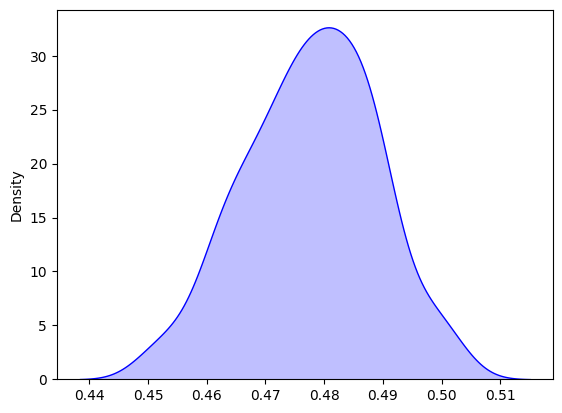

In [ ]:
sns.kdeplot(x=score1, color='b', fill=True)

## ***RandomForest***

In [ ]:
score2 = []

for i in range(100):
  dfTrain, dfTest = train_test_split(finaldf, test_size=.3, random_state=i+1)
  rf = RandomForestRegressor(n_estimators=500, random_state=10)
  rf.fit(dfTrain[inputs], dfTrain[output])
  score2.append(rf.score(dfTest[inputs], dfTest[output]))

  predicciones = rf.predict(dfTest[inputs]).flatten()
  valorsreales = dfTest[output].values.flatten()

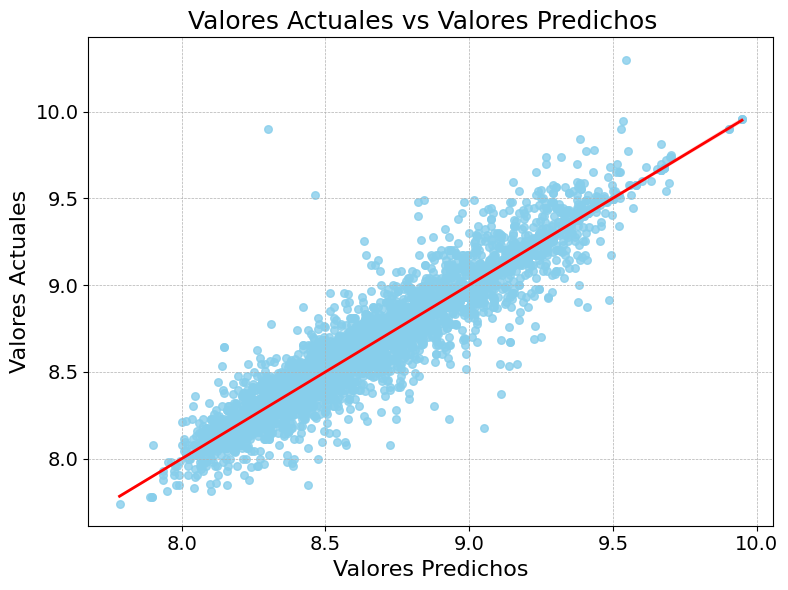

In [ ]:
  plt.figure(figsize=(8, 6))
  reg_plot = sns.regplot(x=predicciones, y=valorsreales,
                        scatter_kws={'color': 'skyblue', 's': 30},
                        line_kws={'color': 'red', 'lw': 2})

  plt.title('Valores Actuales vs Valores Predichos  ' , fontsize=18)
  plt.xlabel('Valores Predichos', fontsize=16)
  plt.ylabel('Valores Actuales', fontsize=16)

  plt.grid(True, which='both', linestyle='--', linewidth=0.5)

  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)

  plt.tight_layout()
  plt.show()

In [ ]:
dfTest.head(3)

,lat,lon,rooms,bedrooms,bathrooms,Casa,Apartamento,surface_total,surface_covered,price
864585,11.001,-74.810,3.0,3.0,2.0,0,1,112.0,112.0,8.591065
230299,6.189,-75.561,4.0,4.0,3.0,0,1,204.0,204.0,8.806180
133816,10.981,-74.782,2.0,2.0,3.0,0,1,99.0,99.0,8.676409


<Axes: ylabel='Density'>

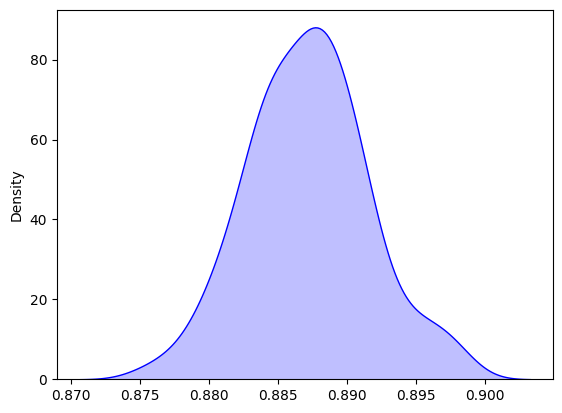

In [ ]:
sns.kdeplot(x=score2, color='b', fill=True)

## ***GradientBoostingRegressor***


In [ ]:
gb = GradientBoostingRegressor(n_estimators=700, learning_rate=0.1, random_state=42)
gb.fit(dfTrain[inputs], dfTrain[output])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(n_estimators=700, random_state=42)

In [ ]:
gb.score(dfTest[inputs], dfTest[output])

0.8809692888656768

In [ ]:
gb.predict(dfTest[inputs]).flatten()

array([9.14569208, 8.92664498, 8.60994342, ..., 8.58856897, 8.58739971,
       8.46444509])

In [ ]:
dfTest.head(3)

,lat,lon,rooms,bedrooms,bathrooms,Casa,Apartamento,surface_total,surface_covered,price
84389,5.267,-73.917,6.0,6.0,6.0,1,0,400.0,300.0,8.977724
303108,4.194,-74.678,4.0,4.0,4.0,1,0,508.0,350.0,8.982271
53435,3.368,-76.517,3.0,3.0,3.0,1,0,135.0,115.0,8.537819


# ***Redes Neuronales***

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [ ]:
inputs = ['lat','lon', 'rooms', 'bedrooms', 'bathrooms',  'Casa','Apartamento', 'surface_total']
output= ['price']

## Modelo 1

In [ ]:
score = []


for i in range(100):
  dfTrain, dfTest = train_test_split(finaldf, test_size=.3, random_state=i+1)
  mlp_ = MLPRegressor(hidden_layer_sizes=(21, 21, 21, 21, 21, 21), activation='tanh', alpha=0.001,)
  mlp_.fit(dfTrain[inputs], dfTrain[output])
  score.append(mlp_.score(dfTest[inputs], dfTest[output]))
  print(i)

  predicciones = mlp_.predict(dfTest[inputs]).flatten()
  valorsreales = dfTest[output].values.flatten()



In [ ]:
print(f"The mean of the scores is: {np.mean(score)}")

The mean of the scores is: 0.7299009147797824


In [ ]:
score

<Axes: ylabel='Density'>

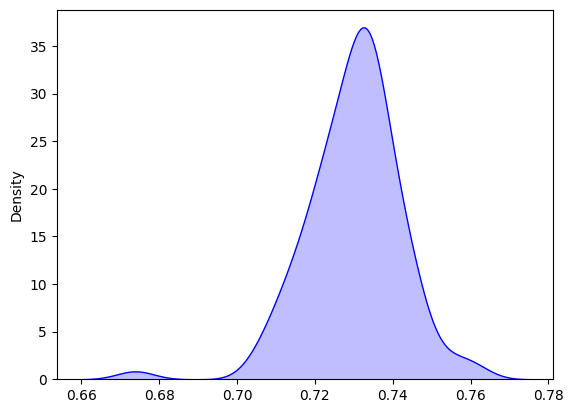

In [ ]:
sns.kdeplot(x=score, color='b', fill=True)

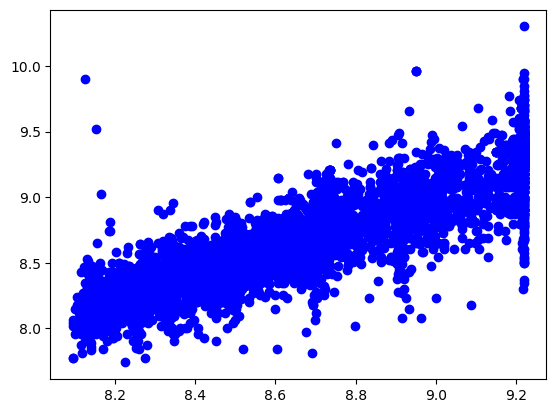

In [ ]:
predicciones = mlp_.predict(dfTest[inputs]).flatten()
valorsreales = dfTest[output].values.flatten()

plt.plot(predicciones, valorsreales, 'ob')

## Modelo 2

In [ ]:
mlp_ = MLPRegressor(hidden_layer_sizes=(21, 21, 21, 21, 21, 21), activation='tanh', alpha=0.001,)
mlp_.fit(dfTrain[inputs], dfTrain[output])
mlp_.score(dfTest[inputs], dfTest[output])
#edinson

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7448475921985931

## Modelo 3

In [ ]:
mlp_ = MLPRegressor(hidden_layer_sizes=(8, 8, 16, 16, 16, 16, 16, 16, 8, 8), activation='logistic', alpha=0.001,)
mlp_.fit(dfTrain[inputs], dfTrain[output])
mlp_.score(dfTest[inputs], dfTest[output])
#yaime

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-2.6585445337623526e-05

## Modelo 4

In [ ]:
mlp_ = MLPRegressor(hidden_layer_sizes=(10, 25, 25, 10), activation='relu', alpha=0.5,)
mlp_.fit(dfTrain[inputs], dfTrain[output])
mlp_.score(dfTest[inputs], dfTest[output])
#maestre

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-122.23941024907339

## Modelo 5

In [ ]:
mlp_ = MLPRegressor(hidden_layer_sizes=(200, 100, 50), activation='relu', alpha=0.0001,)
mlp_.fit(dfTrain[inputs], dfTrain[output])
mlp_.score(dfTest[inputs], dfTest[output])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.42653973378698473

## Modelo 6

In [ ]:
score

[0.7472957903038799,
 0.736660331433536,
 0.754045142305254,
 0.7483895579552656,
 0.7141800490758631,
 0.7391542957375803,
 0.716753228480028,
 0.7159171577374364,
 0.7418018274652735,
 0.7425009927375819,
 0.7297835636812491,
 0.7256415487756703,
 0.7165426929436005,
 0.7438998874052044,
 0.7430295963589197,
 0.7461351843373396,
 0.7280538191116599,
 0.7078623178189066,
 0.7241504891309365,
 0.7247458951625843,
 0.7384813410657678,
 0.713716933549685,
 0.737845795632053,
 0.7229163263334064,
 0.7447136635882139,
 0.7280229443740591,
 0.7277470783917581,
 0.7443598906955489,
 0.7241805298274951,
 0.73905436548678,
 0.7370136740690951,
 0.7389388196809559,
 0.7354936667716405,
 0.7381442469924602,
 0.7444297284587306,
 0.7455468692565121,
 0.7312470859766587,
 0.7185098781379863,
 0.7366069069137042,
 0.7343183387605818,
 0.7361971303542441,
 0.7369644231304715,
 0.7318499491442809,
 0.7211820703255092,
 0.7287864892565696,
 0.7011114169148813,
 0.7227272596440738,
 0.7387258595553423,

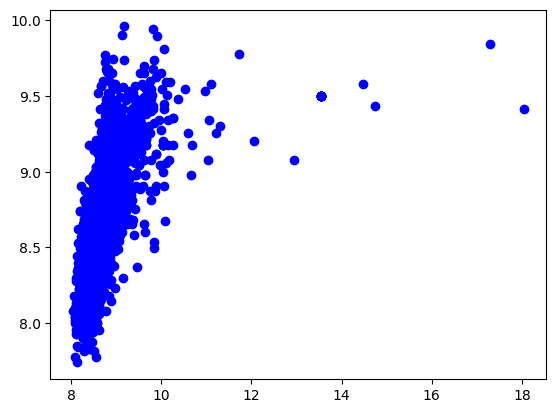

In [ ]:
predicciones = mlp_.predict(dfTest[inputs]).flatten()
valorsreales = dfTest[output].values.flatten()

plt.plot(predicciones, valorsreales, 'ob')

## Modelo 7

In [ ]:
score = []
precision = []
recall = []
f1 = []

for i in range(10):
  dfTrain, dfTest = train_test_split(finaldf, test_size=.2, random_state=i+1)
  mlp_ = MLPRegressor(hidden_layer_sizes=(8, 8, 8, 8, 16, 16, 16, 32, 32), activation='relu', alpha=0.001,)
  mlp_.fit(dfTrain[inputs], dfTrain[output])
  score.append(mlp_.score(dfTest[inputs], dfTest[output]))
  print(i)

  predicciones = mlp_.predict(dfTest[inputs]).flatten()
  valorsreales = dfTest[output].values.flatten()

  # accuracy.append(accuracy_score(valorsreales, predicciones,))
  # precision.append(precision_score(valorsreales, predicciones,))
  # recall.append(recall_score(valorsreales, predicciones, pos_label= 'Aprobado'))
  # f1.append(f1_score(valorsreales, predicciones, pos_label= 'Aprobado',))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9


In [ ]:
score

[-1.0204190675570346,
 -1.2127639539834045,
 0.17930702726202707,
 -6.681156981221385,
 0.34883130660504835,
 -0.16309857149786122,
 0.4594837552124824,
 0.7048640972430666,
 0.3886828050388088,
 0.08988782222268621]